# Calculate the Image Structure Function of the simulated video

In [1]:
#%% Insert path to import
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ddm_toolkit
from ddm_toolkit.workflows import simul2_load_simulation_result_file
from ddm_toolkit.workflows import simul3_calculate_ISF

Running inside a Notebook (Jupyter or otherwise)...


In [4]:
from ddm_toolkit.framestreamers import FrameStreamer_ndarray
from ddm_toolkit.notebook_utils import VideoPlayerUI

In [5]:
# set input filename (simulation result)
# set outpuf filename (ISF)
infpn = '../datafiles/simulNB_simulation_result.npz'
outfpn = '../datafiles/simulNB_ISF.npz'

In [6]:
ims, params = simul2_load_simulation_result_file(infpn)

Loading file: ../datafiles/simulNB_simulation_result.npz


In [7]:
params.ISE_type = 0 # we need to set these parameters, since they were not set before
params.ISE_Npx = ims.shape[1] # use image width to set ISE width
params.ISE_Nbuf = 50

In [8]:
ISF = simul3_calculate_ISF(ims, params)

*** using ImageStructureEngine (the original) ***


  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
ISF.save(outfpn)

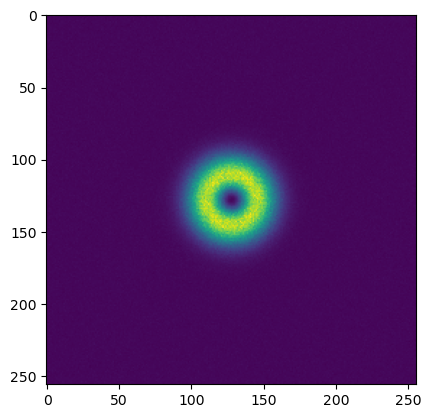

In [10]:
plt.imshow(ISF.ISF[1])

In ddm_toolkit.notebook_utils we have code that uses ipywidgets to make an in-notebook interactive videoplayer.

In [11]:
framestrm = FrameStreamer_ndarray(ISF.ISF)
videoplay = VideoPlayerUI(framestrm)

In [12]:
framestrm.vmin = 0
framestrm.vmax = ISF.ISF.max()/2

In [13]:
videoplay.showUIbox()